In [1]:
!pip install matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bits
n_bits = 20

# Alice and Bob's bits
alice_bits = np.random.randint(2, size=n_bits)
bob_bits   = alice_bits.copy()

# Introduce some random errors (like noise/eavesdropping)
errors_idx = np.random.choice(n_bits, size=3, replace=False)  # 3 errors
bob_bits[errors_idx] = 1 - bob_bits[errors_idx]

# Calculate QBER
errors = np.sum(alice_bits != bob_bits)
qber = errors / n_bits

# Print results
print("Alice:", alice_bits)
print("Bob:  ", bob_bits)
print("Errors:", errors)
print("QBER: {:.2%}".format(qber))



Alice: [1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0]
Bob:   [1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1]
Errors: 3
QBER: 15.00%


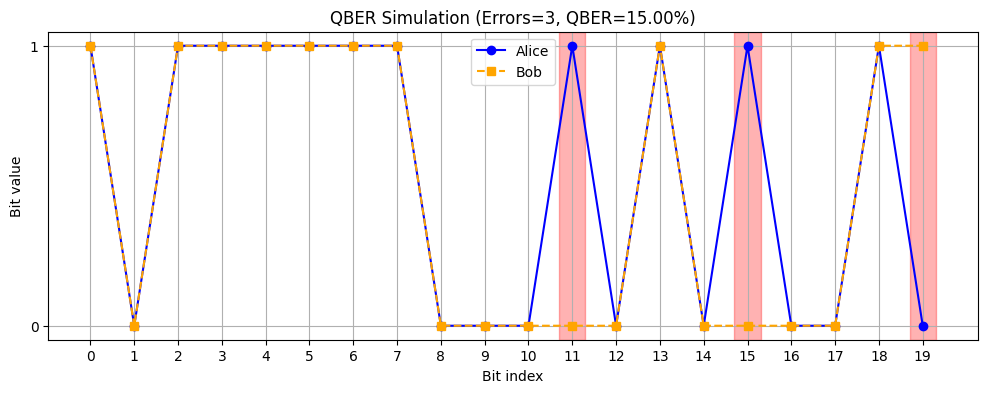

In [4]:
# -------- Visualization --------
plt.figure(figsize=(12,4))
x = np.arange(n_bits)

# Plot Alice's bits
plt.plot(x, alice_bits, 'o-', label="Alice", color='blue')

# Plot Bob's bits
plt.plot(x, bob_bits, 's--', label="Bob", color='orange')

# Highlight errors
for idx in errors_idx:
    plt.axvspan(idx-0.3, idx+0.3, color='red', alpha=0.3)

plt.xticks(x)
plt.yticks([0,1])
plt.xlabel("Bit index")
plt.ylabel("Bit value")
plt.title(f"QBER Simulation (Errors={errors}, QBER={qber:.2%})")
plt.legend()
plt.grid(True)
plt.show()
